In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

## BaseLine model

In [3]:
#Mean Sales
mean_sales = train['Item_Outlet_Sales'].mean()

base1 = test[['Outlet_Identifier','Item_Identifier']]

base1['Item_Outlet_Sales'] = mean_sales

base1.to_csv('algo.csv',index=False)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import cross_validation,metrics

def modelfit(alg,dtrain,dtest,predictors,target,IDcol,filename):
    #Fit the model
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #perform cross-validarion
    cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=20,scoring='mean_squared_error')
    cv_score= np.sqrt(np.abs(cv_score))
    
    #Print model report
    print('\nModel Report: ')
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions)))
    print('\nCV Score: ')
    print('Mean: ',np.mean(cv_score))
    print('Max:  ',np.max(cv_score))
    print('Min:  ',np.min(cv_score))
    print('Std:  ',np.std(cv_score))
    
    
    #Predict on testing data
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission files
    IDcol.append(target)
    submission = pd.DataFrame({x : dtest[x] for x in IDcol})
    submission.to_csv(filename,index=False)

## Linear Regression


Model Report: 
RMSE:  1127.38136927

CV Score: 
Mean:  1128.80818365
Max:   1211.69722074
Min:   1074.5415938
Std:   43.4099188286


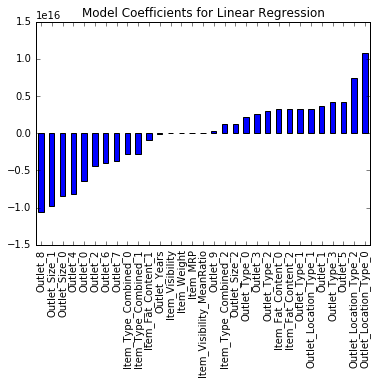

In [5]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

predictors = [x for x in train.columns if x not in [target]+IDcol]
#print(predictors)
alg1 = LinearRegression(normalize=True)
modelfit(alg1,train,test,predictors,target,IDcol,'alg1.csv')
coef1 = pd.Series(alg1.coef_,predictors).sort_values()
coef1.plot(kind='bar',title='Model Coefficients for Linear Regression')

## Ridge Regression


Model Report: 
RMSE:  1128.62498174

CV Score: 
Mean:  1129.88161148
Max:   1216.76832044
Min:   1075.59339887
Std:   44.6049156677


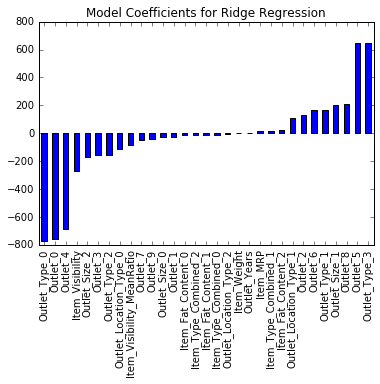

In [6]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients for Ridge Regression')

## Decision Tree Model


Model Report: 
RMSE:  1057.69349417

CV Score: 
Mean:  1091.4994114
Max:   1186.41085677
Min:   1002.7950801
Std:   45.416892289


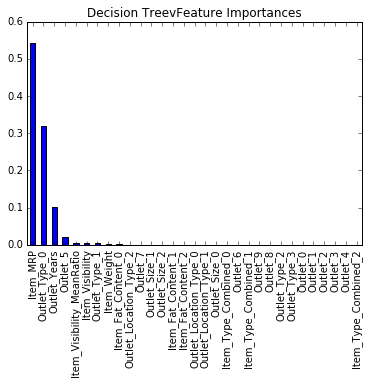

In [7]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Decision TreevFeature Importances')

## DT cont.....


Model Report: 
RMSE:  1071.2364214

CV Score: 
Mean:  1096.10654021
Max:   1171.50223057
Min:   1027.34401644
Std:   43.3021190003


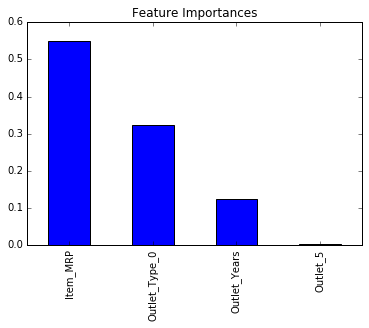

In [8]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## Random Forest


Model Report: 
RMSE:  1072.94052826

CV Score: 
Mean:  1084.00755581
Max:   1161.96319343
Min:   1020.05218626
Std:   44.0588072838


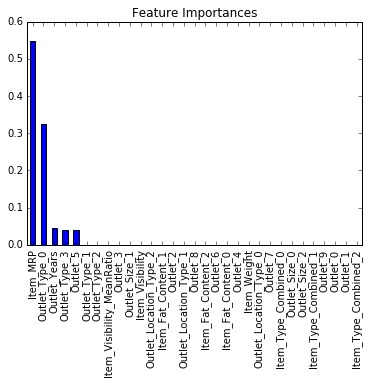

In [9]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report: 
RMSE:  1068.12112083

CV Score: 
Mean:  1082.89748804
Max:   1161.28029796
Min:   1020.15372802
Std:   43.7349324009


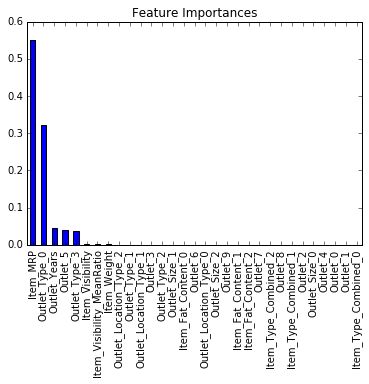

In [10]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')